## Assignment 1

In [52]:
#import torch
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
bondsShort = pd.read_excel('Assignment_1v2.xlsx',skiprows=1, index_col=0).dropna(how='all',axis=1)
bondsShort.tail()

,Issue date,maturity date,coupon rate,denomination,coupon,chosen,2020.1.2,2020.1.3,2020.1.6,2020.1.7,2020.1.8,2020.1.9,2020.1.10,2020.1.13,2020.1.14,2020.1.15
ISIN,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,0.0252198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
bondsMid = pd.read_excel('Assignment_1v2.xlsx', sheet_name='Sheet2', skiprows=1, index_col=0).dropna(how = 'all', axis=1)
bondsMid.tail()

,Issue date,maturity date,coupon rate,denomination,coupon,chosen,2020.1.2,2020.1.3,2020.1.6,2020.1.7,2020.1.8,2020.1.9,2020.1.10,2020.1.13,2020.1.14,2020.1.15
ISIN,,,,,,,,,,,,,,,,
CA135087F825,2016.8.3,2027.6.1,0.0100,100,1.00,NaN,95.46,95.83,95.96,95.93,95.63,95.69,95.73,95.66,95.79,96.01
CA135087VW17,1996.5.1,2027.6.1,0.0800,100,8.00,NaN,143.48,143.94,144.07,144.10,143.68,143.68,143.68,143.59,143.72,144.00
CA135087H235,2017.8.1,2028.6.1,0.0200,100,2.00,NaN,102.84,103.21,103.45,103.34,103.27,102.85,103.07,102.90,103.15,103.34
CA135087J397,2018.7.27,2029.5.31,0.0225,100,2.25,NaN,105.36,105.85,105.98,105.98,105.58,105.55,105.57,105.50,105.67,105.97
CA135087WL43,1998.2.2,2029.6.1,0.0575,100,5.75,NaN,135.27,135.89,135.98,135.97,135.49,135.45,135.53,135.42,135.61,135.96


In [55]:
bonds_chosen = pd.concat([bondsShort.dropna(axis=0), bondsMid.dropna(axis=0)], axis= 0, sort=True)
#bonds_chosen.index = bonds_chosen.ISIN
#bonds_chosen.maturityMonth = None
#for bond in bonds_chosen.index:
#    bonds_chosen.loc[bond].maturityMonth = bonds_chosen.loc[bond, 'maturity date'].split('.')[1]
bonds_chosen.shape

(10, 16)

In [56]:
#change to the date date-type
now = pd.to_datetime('2020.1.10')
bonds_chosen.loc[:,'maturity date'] = pd.to_datetime(bonds_chosen.loc[:, 'maturity date'])
bonds_chosen

,2020.1.10,2020.1.13,2020.1.14,2020.1.15,2020.1.2,2020.1.3,2020.1.6,2020.1.7,2020.1.8,2020.1.9,Issue date,chosen,coupon,coupon rate,denomination,maturity date
ISIN,,,,,,,,,,,,,,,,
CA135087D929,99.96,99.96,99.96,99.96,99.96,99.96,99.96,99.96,99.96,99.96,2014.10.14,1.0,1.50,0.0150,100.0,2020-03-01
CA135087E596,99.38,99.37,99.38,99.39,99.35,99.37,99.37,99.37,99.36,99.37,2015.4.13,1.0,0.75,0.0075,100.0,2020-09-01
CA135087F254,98.90,98.90,98.91,98.92,98.90,98.94,98.94,98.94,98.90,98.92,2015.10.19,1.0,0.75,0.0075,100.0,2021-03-01
CA135087F585,98.51,98.49,98.51,98.52,98.53,98.55,98.56,98.57,98.52,98.54,2016.4.11,1.0,0.75,0.0075,100.0,2021-09-01
CA135087G328,97.59,97.56,97.58,97.60,97.55,97.62,97.62,97.63,97.58,97.62,2016.10.11,1.0,0.50,0.0050,100.0,2022-03-01
CA135087ZU15,102.56,102.53,102.54,102.58,102.55,102.63,102.63,102.64,102.57,102.58,2011.8.2,1.0,2.75,0.0275,100.0,2022-06-01
CA135087H490,100.31,100.27,100.31,100.38,100.31,100.42,100.48,100.45,100.44,100.35,2017.10.6,1.0,1.75,0.0175,100.0,2023-03-01
CA135087A610,99.53,99.50,99.55,99.64,99.52,99.65,99.67,99.68,99.58,99.59,2012.7.30,1.0,1.50,0.0150,100.0,2023-06-01
CA135087J546,102.47,102.46,102.51,102.62,102.45,102.62,102.65,102.68,102.51,102.54,2018.10.5,1.0,2.25,0.0225,100.0,2024-03-01


#### 4(a) ytm

In [57]:
def cal_ytm(pv, bond, now):
    '''calculate the ytm of the given bond,
    and return the maturity time T'''
    def npv(pv, currTime, currFlow, ytm):
        '''calculate the net present value of bond given ytm'''
        npv0 = pv 
        for i in range(len(currFlow)):
            npv0 -= np.exp(-currTime[i] * ytm) * currFlow[i]
        return npv0
    
    now = pd.to_datetime(now)
    coupon = bond.coupon / 2
    maturity = bond.loc['maturity date']
    couponDate = pd.date_range(end = maturity, periods=12, freq = '6M')
    couponTimes = np.sum(couponDate > now)
    currTime = np.ones((couponTimes, 1))
    currFlow = np.ones((couponTimes, 1))
    # generate the currency flow and currency time
    counter = 0
    for day in couponDate:
        if day > now: 
            currTime[counter] = (day.year - now.year) + (day.month - now.month)/ 12 +(day.day - now.day)/360
            currFlow[counter] = coupon
            counter += 1
    currFlow[-1] += bond.denomination
    
    truePrice = pv + coupon * (0.5 - currTime[0][0])/0.5 # calculate the true price
    
    # calculate the ytm of the bond (root of the function npv)
    ytm1 = 0
    ytm2 = 1
    while ytm2 - ytm1 > 10**(-7):
        npv1 = npv(truePrice, currTime, currFlow, ytm1)
        #print(npv1)
        npv2 = npv(truePrice, currTime, currFlow, ytm2)
        ytmnew = (ytm1+ytm2) / 2
        npvnew = npv(truePrice, currTime,currFlow, ytmnew)
        if npvnew*npv1 > 0:
            ytm1 = ytmnew
        else:
            ytm2 = ytmnew
    return (ytm1, currTime, currFlow, truePrice)

ytm, couponDates, cashFlow, truePrice = cal_ytm(99.96, bonds_chosen.iloc[0], '2020.1.10')
ytm, couponDates

(0.01782679557800293, array([[0.13611111]]))

In [58]:
def check_ytm(pv, cashFlow, couponDates, ytm):
    npv = pv
    for i in range(len(cashFlow)):
        npv -= np.exp(- ytm * couponDates[i]) * cashFlow[i]
    return npv
check_ytm(truePrice, cashFlow, couponDates, ytm)

array([-6.97578955e-07])

In [59]:
maturities = []
ytm_daily = pd.DataFrame(bonds_chosen.iloc[:, :10].values, index = bonds_chosen.index, columns=bonds_chosen.columns[:10])
cashFlows = dict()
couponDates = dict()
truePrices = pd.DataFrame(bonds_chosen.iloc[:, :10].values, index = bonds_chosen.index, columns=bonds_chosen.columns[:10])
for bondName in bonds_chosen.index:
    bond = bonds_chosen.loc[bondName]
    #ytm_daily.loc[bondName,:] = []
    for date in bond.index[:10]:
        netpv = bond.loc[date]
        ytm, couponDate, cashFlow, pv = cal_ytm(netpv, bond, date)
        maturity = couponDate[-1][0]
        print(check_ytm(pv, cashFlow, couponDate, ytm), end = '   ')
        ytm_daily.loc[bondName, date] = ytm 
        truePrices.loc[bondName, date] = pv
    maturities.append(maturity)
    cashFlows[bondName] = cashFlow
    couponDates[bondName] = couponDate
ytm_daily

[-6.97578955e-07]   [-3.92804637e-07]   [-7.36521628e-07]   [-8.78998208e-08]   [-5.25212997e-07]   [-6.99023971e-07]   [-4.10540082e-07]   [-4.60265966e-07]   [-6.16205085e-07]   [-7.96408557e-08]   [-2.24386537e-06]   [-2.5742242e-06]   [-2.33122456e-06]   [-2.5378216e-06]   [-1.35954964e-06]   [-2.84486181e-06]   [-2.89445769e-06]   [-1.48402556e-06]   [-1.27037356e-06]   [-2.12029686e-06]   [-2.17238862e-06]   [-3.57142667e-06]   [-3.25739116e-06]   [-1.01614111e-06]   [-5.04249871e-06]   [-4.208595e-06]   [-6.39947699e-06]   [-2.8551957e-06]   [-5.38112891e-06]   [-6.60655472e-06]   [-6.66300234e-06]   [-9.26898707e-07]   [-5.94842713e-06]   [-7.72067754e-06]   [-4.41254252e-06]   [-5.64105721e-06]   [-2.87270352e-06]   [-3.05248847e-06]   [-8.22839856e-06]   [-8.58513935e-06]   [-2.85137133e-06]   [-1.04007943e-05]   [-1.22856129e-06]   [-1.47019638e-06]   [-7.37296023e-06]   [-4.24320289e-06]   [-9.15110729e-06]   [-5.33453104e-06]   [-2.67255274e-07]   [-1.07948677e-05]   [-9.9

,2020.1.10,2020.1.13,2020.1.14,2020.1.15,2020.1.2,2020.1.3,2020.1.6,2020.1.7,2020.1.8,2020.1.9
ISIN,,,,,,,,,,
CA135087D929,0.017827,0.018016,0.018085,0.018157,0.017420,0.017464,0.017608,0.017659,0.017713,0.017769
CA135087E596,0.017114,0.017399,0.017283,0.017166,0.017247,0.016983,0.017104,0.017145,0.017342,0.017228
CA135087F254,0.017284,0.017356,0.017290,0.017224,0.017096,0.016768,0.016835,0.016858,0.017236,0.017082
CA135087F585,0.016642,0.016814,0.016704,0.016657,0.016398,0.016290,0.016273,0.016226,0.016550,0.016441
CA135087G328,0.016481,0.016671,0.016590,0.016508,0.016554,0.016235,0.016278,0.016245,0.016500,0.016322
CA135087ZU15,0.016467,0.016556,0.016502,0.016322,0.016606,0.016262,0.016225,0.016171,0.016450,0.016396
CA135087H490,0.016425,0.016554,0.016422,0.016193,0.016432,0.016076,0.015878,0.015974,0.016005,0.016296
CA135087A610,0.016362,0.016456,0.016306,0.016033,0.016383,0.015993,0.015935,0.015906,0.016209,0.016180
CA135087J546,0.016231,0.016244,0.016117,0.015843,0.016311,0.015892,0.015807,0.015729,0.016141,0.016064


In [60]:
truePrices

,2020.1.10,2020.1.13,2020.1.14,2020.1.15,2020.1.2,2020.1.3,2020.1.6,2020.1.7,2020.1.8,2020.1.9
ISIN,,,,,,,,,,
CA135087D929,100.505833,100.518333,100.522500,100.526667,100.472500,100.476667,100.489167,100.493333,100.497500,100.501667
CA135087E596,99.652917,99.649167,99.661250,99.673333,99.606250,99.628333,99.634583,99.636667,99.628750,99.640833
CA135087F254,99.172917,99.179167,99.191250,99.203333,99.156250,99.198333,99.204583,99.206667,99.168750,99.190833
CA135087F585,98.782917,98.769167,98.791250,98.803333,98.786250,98.808333,98.824583,98.836667,98.788750,98.810833
CA135087G328,97.771944,97.746111,97.767500,97.788889,97.720833,97.792222,97.796389,97.807778,97.759167,97.800556
CA135087ZU15,102.857917,102.850833,102.868472,102.916111,102.786806,102.874444,102.897361,102.915000,102.852639,102.870278
CA135087H490,100.946806,100.921389,100.966250,101.041111,100.907917,101.022778,101.097361,101.072222,101.067083,100.981944
CA135087A610,99.692500,99.675000,99.729167,99.823333,99.649167,99.783333,99.815833,99.830000,99.734167,99.748333
CA135087J546,103.288750,103.297500,103.353750,103.470000,103.218750,103.395000,103.443750,103.480000,103.316250,103.352500


In [61]:
futureCashFlow = dict()
for bond in couponDates.keys():
    n = cashFlows[bond].shape[0]
    futureCashFlow[bond] = pd.Series(cashFlows[bond].reshape(n), index = couponDates[bond].reshape(n))
futureCashFlow[bonds_chosen.index[5]]

0.394444      1.375
0.891667      1.375
1.394444      1.375
1.891667      1.375
2.394444    101.375
dtype: float64

In [62]:
bonds_chosen.loc[:,'maturities'] = maturities
bonds_chosen

,2020.1.10,2020.1.13,2020.1.14,2020.1.15,2020.1.2,2020.1.3,2020.1.6,2020.1.7,2020.1.8,2020.1.9,Issue date,chosen,coupon,coupon rate,denomination,maturity date,maturities
ISIN,,,,,,,,,,,,,,,,,
CA135087D929,99.96,99.96,99.96,99.96,99.96,99.96,99.96,99.96,99.96,99.96,2014.10.14,1.0,1.50,0.0150,100.0,2020-03-01,0.138889
CA135087E596,99.38,99.37,99.38,99.39,99.35,99.37,99.37,99.37,99.36,99.37,2015.4.13,1.0,0.75,0.0075,100.0,2020-09-01,0.644444
CA135087F254,98.90,98.90,98.91,98.92,98.90,98.94,98.94,98.94,98.90,98.92,2015.10.19,1.0,0.75,0.0075,100.0,2021-03-01,1.136111
CA135087F585,98.51,98.49,98.51,98.52,98.53,98.55,98.56,98.57,98.52,98.54,2016.4.11,1.0,0.75,0.0075,100.0,2021-09-01,1.644444
CA135087G328,97.59,97.56,97.58,97.60,97.55,97.62,97.62,97.63,97.58,97.62,2016.10.11,1.0,0.50,0.0050,100.0,2022-03-01,2.136111
CA135087ZU15,102.56,102.53,102.54,102.58,102.55,102.63,102.63,102.64,102.57,102.58,2011.8.2,1.0,2.75,0.0275,100.0,2022-06-01,2.394444
CA135087H490,100.31,100.27,100.31,100.38,100.31,100.42,100.48,100.45,100.44,100.35,2017.10.6,1.0,1.75,0.0175,100.0,2023-03-01,3.136111
CA135087A610,99.53,99.50,99.55,99.64,99.52,99.65,99.67,99.68,99.58,99.59,2012.7.30,1.0,1.50,0.0150,100.0,2023-06-01,3.394444
CA135087J546,102.47,102.46,102.51,102.62,102.45,102.62,102.65,102.68,102.51,102.54,2018.10.5,1.0,2.25,0.0225,100.0,2024-03-01,4.138889


In [63]:
ytm_daily.loc[:, 'maturities'] = maturities
ytm_daily

,2020.1.10,2020.1.13,2020.1.14,2020.1.15,2020.1.2,2020.1.3,2020.1.6,2020.1.7,2020.1.8,2020.1.9,maturities
ISIN,,,,,,,,,,,
CA135087D929,0.017827,0.018016,0.018085,0.018157,0.017420,0.017464,0.017608,0.017659,0.017713,0.017769,0.138889
CA135087E596,0.017114,0.017399,0.017283,0.017166,0.017247,0.016983,0.017104,0.017145,0.017342,0.017228,0.644444
CA135087F254,0.017284,0.017356,0.017290,0.017224,0.017096,0.016768,0.016835,0.016858,0.017236,0.017082,1.136111
CA135087F585,0.016642,0.016814,0.016704,0.016657,0.016398,0.016290,0.016273,0.016226,0.016550,0.016441,1.644444
CA135087G328,0.016481,0.016671,0.016590,0.016508,0.016554,0.016235,0.016278,0.016245,0.016500,0.016322,2.136111
CA135087ZU15,0.016467,0.016556,0.016502,0.016322,0.016606,0.016262,0.016225,0.016171,0.016450,0.016396,2.394444
CA135087H490,0.016425,0.016554,0.016422,0.016193,0.016432,0.016076,0.015878,0.015974,0.016005,0.016296,3.136111
CA135087A610,0.016362,0.016456,0.016306,0.016033,0.016383,0.015993,0.015935,0.015906,0.016209,0.016180,3.394444
CA135087J546,0.016231,0.016244,0.016117,0.015843,0.016311,0.015892,0.015807,0.015729,0.016141,0.016064,4.138889


In [64]:
yield_curves = dict()
for i in range(10):
    date = bonds_chosen.columns[i]
    yield_curves[date] = []
    bonds_chosen['yield'+date] = 0
    for bond in ytm_daily:
        yield_curves[date].append(ytm_daily[bond][i])
        bonds_chosen['yield'+date][bond] = ytm_daily[bond][i]
        #print(ytm_daily[bond][i])
bonds_chosen

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,2020.1.10,2020.1.13,2020.1.14,2020.1.15,2020.1.2,2020.1.3,2020.1.6,2020.1.7,2020.1.8,2020.1.9,...,yield2020.1.10,yield2020.1.13,yield2020.1.14,yield2020.1.15,yield2020.1.2,yield2020.1.3,yield2020.1.6,yield2020.1.7,yield2020.1.8,yield2020.1.9
ISIN,,,,,,,,,,,,,,,,,,,,,
CA135087D929,99.96,99.96,99.96,99.96,99.96,99.96,99.96,99.96,99.96,99.96,...,0,0,0,0,0,0,0,0,0,0
CA135087E596,99.38,99.37,99.38,99.39,99.35,99.37,99.37,99.37,99.36,99.37,...,0,0,0,0,0,0,0,0,0,0
CA135087F254,98.90,98.90,98.91,98.92,98.90,98.94,98.94,98.94,98.90,98.92,...,0,0,0,0,0,0,0,0,0,0
CA135087F585,98.51,98.49,98.51,98.52,98.53,98.55,98.56,98.57,98.52,98.54,...,0,0,0,0,0,0,0,0,0,0
CA135087G328,97.59,97.56,97.58,97.60,97.55,97.62,97.62,97.63,97.58,97.62,...,0,0,0,0,0,0,0,0,0,0
CA135087ZU15,102.56,102.53,102.54,102.58,102.55,102.63,102.63,102.64,102.57,102.58,...,0,0,0,0,0,0,0,0,0,0
CA135087H490,100.31,100.27,100.31,100.38,100.31,100.42,100.48,100.45,100.44,100.35,...,0,0,0,0,0,0,0,0,0,0
CA135087A610,99.53,99.50,99.55,99.64,99.52,99.65,99.67,99.68,99.58,99.59,...,0,0,0,0,0,0,0,0,0,0
CA135087J546,102.47,102.46,102.51,102.62,102.45,102.62,102.65,102.68,102.51,102.54,...,0,0,0,0,0,0,0,0,0,0


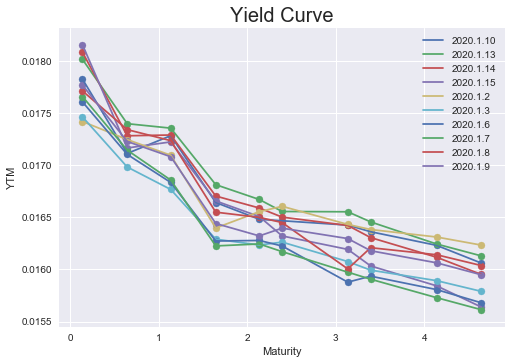

In [65]:
plt.style.use('seaborn')
for date in ytm_daily.columns[:10]:
    yieldCurve = ytm_daily[date]
    plt.plot(maturities,yieldCurve, label=date)
    plt.scatter(maturities, yieldCurve)
    #plt.title(date+'YieldCurve', fontsize = 18)
    plt.xlabel('Maturity')
    plt.ylabel('YTM')
plt.title('Yield Curve', fontsize = 20)
plt.legend(loc='best')
plt.savefig('YieldCurve.jpg')

#### Spot Rate and Future Rate


In [66]:
from scipy.optimize import fsolve
# a simple test of the function 
def f(x, *args):
    return 2*np.sum(x) + np.sum(args) + np.dot(x, x)
fsolve(f, [0], args=(0.5, 0.5))

array([-1.])

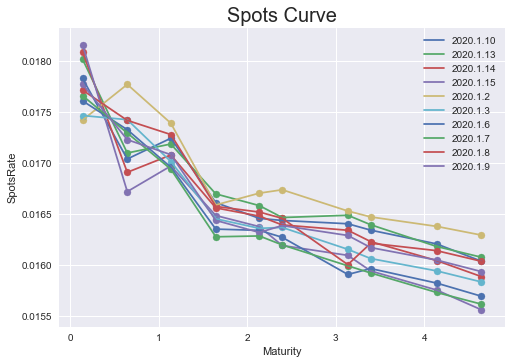

In [67]:
def ytm2spots(bonds, truePrices, yieldCurve, futureCashFlow):
    '''derive the spots rate from the yield curve'''
    def func(x, *args):
        #get the parameters 
        r = x[0]
        pv = args[0]
        cashFlow = args[1]
        resNum = args[2]
        spotsRate = args[3].copy()
        solvedMaturities = args[4].copy()
        maturities = cashFlow.index
        # take x as known and do interpolation 
        spotsRate.append(r)
        solvedMaturities.append(cashFlow.index[-1])
        values = np.ones(resNum)

        for i in range(resNum):
            t = maturities[i]
            values[i] = np.interp(t, solvedMaturities, spotsRate)
        return pv - np.dot(cashFlow.values, np.exp(-values * maturities))
    #bonds = bonds_chosen['2020.1.3']
    #yieldCurve = ytm_daily['2020.1.3']
    
    # initialization 

    spotsRate = []
    solvedMaturities = []
    cashFlowZero = futureCashFlow[bonds.index[0]]
    spotsRate.append(yieldCurve[0])
    solvedMaturities.append(cashFlowZero.index[-1])
    last_date = cashFlowZero.index[-1]

    #iteration
    for bond_name in bonds.index[1:]: #has been sorted by maturities 
        cashFlow = futureCashFlow[bond_name]
        maturity = cashFlow.index[-1]
        res = cashFlow.index > last_date
        explained = cashFlow.index <= last_date
        resNum = np.sum(res)
        #print(res, resNum)
        pv = truePrices.loc[bond_name]
        for i in range(len(cashFlow.index) - resNum):
            t = cashFlow.index[i]
            pv -= cashFlow.iloc[i] * np.exp(-t * np.interp(t, solvedMaturities, spotsRate))  
        explainedPart = cashFlow.iloc[np.sum(explained):]
        r = fsolve(func, [0.1], args = (pv, explainedPart, resNum, spotsRate, solvedMaturities))[0]
        spotsRate.append(r)
        solvedMaturities.append(maturity)
        last_date = maturity
       # print(spotsRate)
    return spotsRate

spotsCurves = dict()
for date in bonds_chosen.columns[:10]:
    spotsRate = ytm2spots(bonds_chosen.loc[:,date], truePrices.loc[:,date], ytm_daily.loc[:,date], futureCashFlow)
    spotsCurves[date] = spotsRate
    plt.plot(maturities,spotsRate, label=date)
    plt.scatter(maturities, spotsRate)

plt.xlabel('Maturity')
plt.ylabel('SpotsRate')
plt.title('Spots Curve', fontsize = 20)
plt.legend(loc='best')
plt.savefig('SpotsRate.jpg')

#### 4(c)

**Foward Rate** 

$$ e^{fowardRate_{t} \times (T-t)} * e^{spotsRate_t \times t} = e^{spotsRate_T \times T}\\
    fowardRate_t = \frac{spotsRate_T * T - spotsRate_t * t}{T-t}$$


In [68]:
spotsRate = spotsCurves['2020.1.3']
print(spotsRate)
spotsRate = np.interp([1,2,3,4,5], maturities, spotsRate)
print(spotsRate)

[0.017464280128479004, 0.017423557419984106, 0.017013774478185566, 0.016453318851216505, 0.01636007922520656, 0.016368817757834938, 0.01615451280329738, 0.01606414583965419, 0.01594350033350414, 0.015835365133634424]
[0.01712722 0.01638589 0.01619384 0.01596601 0.01583537]


[0.01718557 0.0165003  0.01641073 0.01623268 0.01603827]
[0.01716118 0.01661426 0.01648386 0.01622237 0.01607726]
[0.01703102 0.01650191 0.01635084 0.01607913 0.0158877 ]
[0.01690087 0.01640673 0.01611321 0.01579086 0.01556307]
[0.01749443 0.01667254 0.01656762 0.01639647 0.01629385]
[0.01712722 0.01638589 0.01619384 0.01596601 0.01583537]
[0.01705983 0.01634362 0.01597532 0.0158507  0.01569551]
[0.01703737 0.01628314 0.01603064 0.01576809 0.01561807]
[0.01731658 0.01653459 0.01608793 0.01615528 0.01603752]
[0.01712174 0.01635248 0.01630799 0.01607244 0.0159368 ]


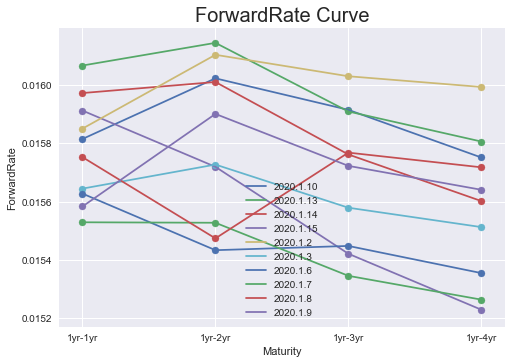

In [69]:
def spots2forward(spots, maturities):
    '''calculate forward rate from spots rate'''
    forwardRate = np.ones(len(maturities) -1)

    for i in range(1,len(spots)):
        forwardRate[i-1] =  (spotsRate[i] * maturities[i] - spotsRate[0] * maturities[0]
                         ) / (maturities[i] - maturities[0])
    return forwardRate

forwardCurves = dict()
for date in bonds_chosen.columns[:10]:
    spotsRate = spotsCurves[date]
    #using linear interpolation to get the spots rate of 1,2,3,4,5 year
    spotsRate = np.interp([1,2,3,4,5], maturities, spotsRate)
    print(spotsRate)
    forwardRate = spots2forward(spotsRate, [1,2,3,4,5])
    forwardCurves[date] = forwardRate
    plt.plot([1,2,3,4], forwardRate, label=date)
    plt.scatter([1,2,3,4], forwardRate)


plt.xlabel('Maturity')
plt.ylabel('ForwardRate')
plt.xticks(np.arange(1,5), ['1yr-1yr','1yr-2yr', '1yr-3yr', '1yr-4yr'])
#plt.xlim([0.5,5])
plt.title('ForwardRate Curve', fontsize = 20)
plt.legend(loc='best')
plt.savefig('forwardRate.jpg')

In [70]:
def check_forward(forwardRate, maturities, spot0):
    '''check the correctness of forward rate'''
    spotsRate = np.ones(len(maturities))
    spotsRate[0] = spot0
    for i in range(1, len(maturities)):
        spotsRate[i] = (forwardRate[i-1] * (maturities[i] - maturities[i-1]) + 
            spotsRate[i-1] *maturities[i-1] )/ maturities[i]
    return spotsRate

#forwardRate  =spots2forward(spotsCurves['2020.1.3'], maturities)
spotsRate = spotsCurves['2020.1.3']
spotsRate
#np.exp(spotsRate[1] * maturities[1])/np.exp(spotsRate[0] *maturities[0]
#                                           ) - np.exp(forwardRate[0] * (maturities[1]- maturities[0])) 

[0.017464280128479004,
 0.017423557419984106,
 0.017013774478185566,
 0.016453318851216505,
 0.01636007922520656,
 0.016368817757834938,
 0.01615451280329738,
 0.01606414583965419,
 0.01594350033350414,
 0.015835365133634424]

### 5 covariance matrices

In [71]:
ytm_daily

,2020.1.10,2020.1.13,2020.1.14,2020.1.15,2020.1.2,2020.1.3,2020.1.6,2020.1.7,2020.1.8,2020.1.9,maturities
ISIN,,,,,,,,,,,
CA135087D929,0.017827,0.018016,0.018085,0.018157,0.017420,0.017464,0.017608,0.017659,0.017713,0.017769,0.138889
CA135087E596,0.017114,0.017399,0.017283,0.017166,0.017247,0.016983,0.017104,0.017145,0.017342,0.017228,0.644444
CA135087F254,0.017284,0.017356,0.017290,0.017224,0.017096,0.016768,0.016835,0.016858,0.017236,0.017082,1.136111
CA135087F585,0.016642,0.016814,0.016704,0.016657,0.016398,0.016290,0.016273,0.016226,0.016550,0.016441,1.644444
CA135087G328,0.016481,0.016671,0.016590,0.016508,0.016554,0.016235,0.016278,0.016245,0.016500,0.016322,2.136111
CA135087ZU15,0.016467,0.016556,0.016502,0.016322,0.016606,0.016262,0.016225,0.016171,0.016450,0.016396,2.394444
CA135087H490,0.016425,0.016554,0.016422,0.016193,0.016432,0.016076,0.015878,0.015974,0.016005,0.016296,3.136111
CA135087A610,0.016362,0.016456,0.016306,0.016033,0.016383,0.015993,0.015935,0.015906,0.016209,0.016180,3.394444
CA135087J546,0.016231,0.016244,0.016117,0.015843,0.016311,0.015892,0.015807,0.015729,0.016141,0.016064,4.138889


In [72]:
dates = list(bonds_chosen.columns[:10])
dates = dates[4:] +  dates[:4]
dates

['2020.1.2',
 '2020.1.3',
 '2020.1.6',
 '2020.1.7',
 '2020.1.8',
 '2020.1.9',
 '2020.1.10',
 '2020.1.13',
 '2020.1.14',
 '2020.1.15']

In [73]:
date = '2020.1.3'

ytm_series = dict()
for date in dates:
    ytm = np.interp([1,2,3,4,5], maturities, ytm_daily[date])
    ytm_series[date] = ytm
ytm_series = pd.DataFrame(ytm_series, index = [1,2,3,4,5])
#dates = ['2020
#np.cov([[1,2],[1,2],[1,2]])
ytm_series


,2020.1.2,2020.1.3,2020.1.6,2020.1.7,2020.1.8,2020.1.9,2020.1.10,2020.1.13,2020.1.14,2020.1.15
1,0.017138,0.016827,0.016909,0.016937,0.017266,0.017122,0.017237,0.017368,0.017288,0.017208
2,0.016511,0.016250,0.016277,0.016239,0.016514,0.016355,0.016526,0.016711,0.016621,0.016549
3,0.016464,0.016110,0.015942,0.016010,0.016087,0.016315,0.016433,0.016554,0.016437,0.016216
4,0.016325,0.015911,0.015831,0.015762,0.016154,0.016085,0.016256,0.016284,0.016152,0.015878
5,0.016234,0.015790,0.015680,0.015614,0.016037,0.015949,0.016061,0.016130,0.015952,0.015639


In [74]:
for i in range(len(dates) - 1):
    j = dates[i]
    jplus = dates[i+1]
    ytm_series[j] = np.log(ytm_series[jplus] / ytm_series[j])
ytm_series

,2020.1.2,2020.1.3,2020.1.6,2020.1.7,2020.1.8,2020.1.9,2020.1.10,2020.1.13,2020.1.14,2020.1.15
1,-0.018286,0.004874,0.001642,0.019199,-0.008335,0.006667,0.007591,-0.004604,-0.004654,0.017208
2,-0.015938,0.001635,-0.002288,0.016739,-0.009655,0.010401,0.011126,-0.005361,-0.004358,0.016549
3,-0.021743,-0.010500,0.004280,0.004782,0.014066,0.007239,0.007327,-0.007105,-0.013508,0.016216
4,-0.025659,-0.005073,-0.004340,0.024540,-0.004248,0.010542,0.001726,-0.008100,-0.017119,0.015878
5,-0.027731,-0.006970,-0.004240,0.026777,-0.005538,0.007009,0.004296,-0.011118,-0.019789,0.015639


In [81]:
X = ytm_series.iloc[:,:9]
covYTM = np.cov(X)
pd.DataFrame(covYTM,index = np.arange(1,6), columns=np.arange(1, 6))

,1,2,3,4,5
1,0.000118,0.000112,0.000067,0.000145,0.000158
2,0.000112,0.000114,0.000065,0.000140,0.000152
3,0.000067,0.000065,0.000142,0.000123,0.000134
4,0.000145,0.000140,0.000123,0.000214,0.000230
5,0.000158,0.000152,0.000134,0.000230,0.000251


In [82]:
forwardCurves = pd.DataFrame(forwardCurves)
covForward = np.cov(forwardCurves)
pd.DataFrame(covForward,index = np.arange(1,5), columns=np.arange(1, 5))

,1,2,3,4
1,3.194162e-08,3.134545e-08,2.258120e-08,1.840149e-08
2,3.134545e-08,7.145976e-08,4.836759e-08,4.555216e-08
3,2.258120e-08,4.836759e-08,5.440015e-08,5.660536e-08
4,1.840149e-08,4.555216e-08,5.660536e-08,6.151536e-08


### 6

In [77]:
eigenYTM = np.linalg.eig(covYTM)
eigenForward = np.linalg.eig(covForward)

In [78]:
print('=======First eigenvalue and its associated eigenvector==========')
print('log-return of yield', eigenYTM[0][0], eigenYTM[1][0])
print('forward rates', eigenForward[0][0], eigenForward[1][0])


=======First eigenvalue and its associated eigenvector==========
log-return of yield 0.0007353011394867003 [-0.37478132 -0.34553574 -0.38535865  0.75344166 -0.15481725]
forward rates 1.751192619532298e-07 [ 0.28138305  0.5925052  -0.74613889  0.11418372]
